<!-- K-Means Clustering – Theory
What is K-Means?

K-Means Clustering is an unsupervised learning algorithm used to group data into K distinct clusters based on similarity. It partitions data such that data points within the same cluster are more similar to each other than to those in other clusters.
How Does It Work?

    Initialize K cluster centers (called centroids), either randomly or using specific methods like k-means++.

    Assign each data point to the nearest centroid.

    Update each centroid by calculating the mean of the data points assigned to it.

    Repeat steps 2 and 3 until:

        Centroids don’t change (convergence), or

        Maximum iterations reached.

Objective Function

Minimize the intra-cluster variance (within-cluster sum of squares):
J=∑i=1k∑x∈Ci∥x−μi∥2
J=i=1∑k​x∈Ci​∑​∥x−μi​∥2

Where:

    CiCi​: data points in cluster ii

    μiμi​: centroid of cluster ii

Advantages

    Simple and fast

    Works well on spherical-shaped clusters

Limitations

    Need to choose K in advance

    Sensitive to initial centroids

    Poor performance on non-globular clusters or with different densities -->

K-Means Clustering – Theory
What is K-Means?

K-Means Clustering is an unsupervised learning algorithm used to group data into K distinct clusters based on similarity. It partitions data such that data points within the same cluster are more similar to each other than to those in other clusters.
How Does It Work?

    Initialize K cluster centers (called centroids), either randomly or using specific methods like k-means++.

    Assign each data point to the nearest centroid.

    Update each centroid by calculating the mean of the data points assigned to it.

    Repeat steps 2 and 3 until:

        Centroids don’t change (convergence), or

        Maximum iterations reached.

Objective Function

Minimize the intra-cluster variance (within-cluster sum of squares):
J=∑i=1k∑x∈Ci∥x−μi∥2
J=i=1∑k​x∈Ci​∑​∥x−μi​∥2

Where:

    CiCi​: data points in cluster ii

    μiμi​: centroid of cluster ii

Advantages

    Simple and fast

    Works well on spherical-shaped clusters

Limitations

    Need to choose K in advance

    Sensitive to initial centroids

    Poor performance on non-globular clusters or with different densities

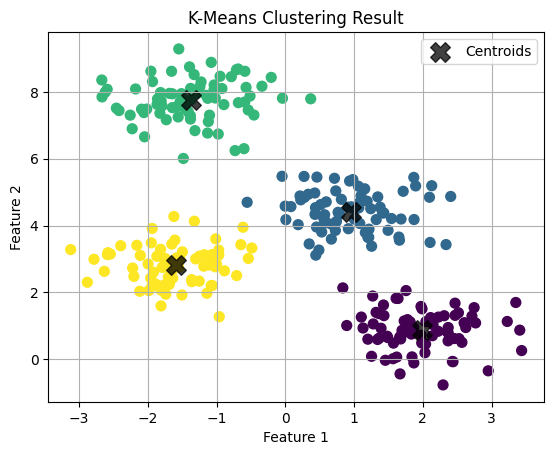

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centroids')
plt.legend()
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


---

##  Code Explanation – K-Means Clustering

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
```

* **`numpy`**: for numerical operations.
* **`matplotlib.pyplot`**: used for plotting graphs.
* **`make_blobs`**: generates synthetic data for clustering (scikit-learn).
* **`KMeans`**: the K-Means clustering algorithm from scikit-learn.

---

```python
# Create synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
```

* `make_blobs()` creates 300 data points (`n_samples=300`).
* These are grouped into 4 clusters (`centers=4`) with standard deviation `0.60`.
* `X` contains the **coordinates** of points (features).
* `y_true` contains the **true labels** (used only for checking, not for clustering).

---

```python
# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
```

* Initialize the KMeans algorithm with **4 clusters** (`n_clusters=4`).
* `random_state=42` ensures reproducibility (same output each run).

---

```python
kmeans.fit(X)
```

* Fits the KMeans algorithm to the data `X`.
* Internally:

  * Initializes 4 random centroids.
  * Assigns each point to the closest centroid.
  * Recomputes centroids as the mean of the assigned points.
  * Repeats until centroids don't change much (convergence).

---

```python
y_kmeans = kmeans.predict(X)
```

* After training, this assigns each point to its **nearest cluster**.
* `y_kmeans` now contains predicted cluster labels (0, 1, 2, 3).

---

```python
# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
```

* Plots all the points in 2D.
* `X[:, 0]` is x-coordinate, `X[:, 1]` is y-coordinate.
* `c=y_kmeans` colors the points based on predicted cluster.
* `s=50` is marker size, `cmap='viridis'` gives a nice color map.

---

```python
centers = kmeans.cluster_centers_
```

* Gets the **coordinates** of the final cluster centers (centroids) after fitting.

---

```python
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centroids')
```

* Plots the centroids in **black** as large **X markers**.
* `s=200` makes them bigger.
* `alpha=0.75` makes them semi-transparent.
* `label='Centroids'` adds a label for legend.

---

```python
plt.legend()
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
```

* Adds legend, title, x and y axis labels.
* `plt.grid(True)` shows gridlines for better readability.
* `plt.show()` displays the final plot.

---

## Summary

This code:

* Generates 4-cluster synthetic data.
* Applies K-Means to find and assign clusters.
* Visualizes the clustered data and shows the learned centroids.




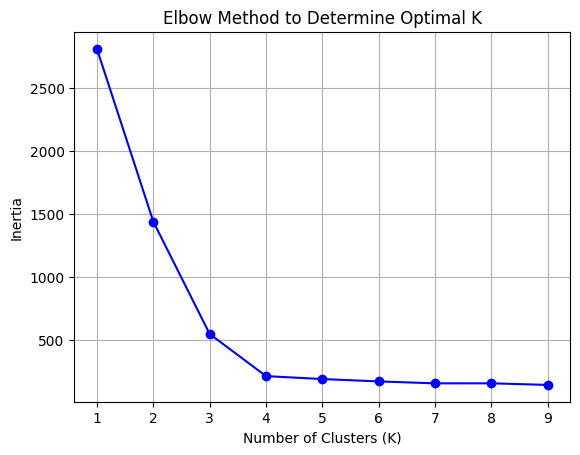

In [4]:
inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.show()


---

##  What is the Elbow Method?

* K-Means tries to minimize **inertia** (also called within-cluster sum of squares).
* Inertia = total distance of all points from their assigned cluster's centroid.
* Lower inertia = tighter clusters.
* But if you keep increasing K, inertia always decreases.
* So we look for an **"elbow" point** in the plot of **K vs inertia**, where the decrease in inertia starts to slow down.

That point is usually the **best choice for K**.

---

##  Code Explanation

```python
inertia = []
K = range(1, 10)
```

* `inertia` is an empty list that will store the inertia values for each `k`.
* `K = range(1, 10)` tries values of `k` from 1 to 9.

---

```python
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)
```

* For each number of clusters `k`, we:

  1. Initialize KMeans with `k` clusters.
  2. Fit it to the dataset `X`.
  3. Save the **inertia** (km.inertia\_) after fitting.

So `inertia[i]` corresponds to the total within-cluster sum of squares for `k = i+1`.

---

```python
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.show()
```

* `plt.plot(K, inertia, 'bo-')` plots blue circles (`'bo'`) connected by lines (`'-'`).
* This shows how **inertia changes** as you increase K.
* You look for the **"elbow" point**—the spot after which adding more clusters doesn’t reduce inertia significantly.

---

##  What You'll See in the Plot

* The curve drops quickly at first (as K increases).
* Eventually, it **flattens**.
* The **"elbow" point** is considered the optimal number of clusters.

  * That’s the point where adding more clusters gives **diminishing returns**.

---

##  Summary

* You're plotting `K` vs `inertia`.
* The best K is at the **"elbow"** where inertia stops decreasing rapidly.
* This helps avoid **underfitting** (too few clusters) or **overfitting** (too many).

